In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresion Lineal

In [0]:
dataset = pd.read_csv("./kc_house_data.csv")
space = dataset["sqft_living"]
price = dataset["price"]
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
x = np.array(space).reshape(-1, 1)
y = np.array(price)
print(x)
print(y)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=1/3, random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

pred = regressor.predict(xtest)

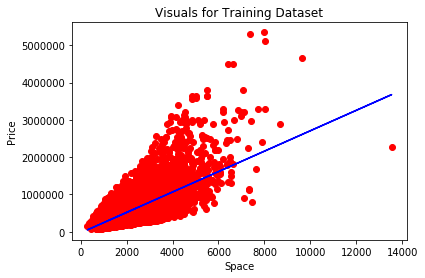

In [0]:
plt.scatter(xtrain, ytrain, color="red")
plt.plot(xtrain, regressor.predict(xtrain), color="blue")
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()


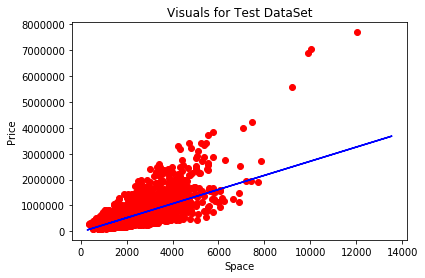

In [0]:
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [0]:
prediction = regressor.predict([[1180]])
prediction

array([294046.45440966])

# Clasificacion

In [0]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

y_iris = iris['species']
y_iris.shape

(150,)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [0]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)


In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [0]:
x = [[4.7,	3.2,	1.3,	0.2]]
model.predict(x)

array(['setosa'], dtype='<U10')

# Decision Trees

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

In [0]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz
from io import StringIO


# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "myTreeName.dot",
            feature_names = list(X.columns),
            class_names = iris.target_names,
            filled = True,
            rounded = True)

In [0]:
import pydotplus 
#!pip install -q pydot

from ipywidgets import Image
graph = pydotplus.graph_from_dot_file("myTreeName.dot")
#Image(value=graph.create_png())
graph.write_png("dtree.png")


True

In [0]:
sample_one_pred = int(tree.predict([[5, 5, 1, 3]]))
sample_two_pred = int(tree.predict([[5, 5, 2.6, 1.5]]))
print(f"The first sample most likely belongs a {iris.target_names[sample_one_pred]} flower.")
print(f"The second sample most likely belongs a {iris.target_names[sample_two_pred]} flower.")

The first sample most likely belongs a setosa flower.
The second sample most likely belongs a versicolor flower.


# Random Forest

In [0]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

diamonds = diamonds.drop(['Unnamed: 0'], axis = 1)
categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()

# Convert the variables to numerical
for i in range(3):
    new = le.fit_transform(diamonds[categorical_features[i]])
    diamonds[categorical_features[i]] = new
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [0]:
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
y = diamonds[['price']]

print(X, y)

       carat  depth  table     x     y     z  clarity  cut  color
0       0.23   61.5   55.0  3.95  3.98  2.43        3    2      1
1       0.21   59.8   61.0  3.89  3.84  2.31        2    3      1
2       0.23   56.9   65.0  4.05  4.07  2.31        4    1      1
3       0.29   62.4   58.0  4.20  4.23  2.63        5    3      5
4       0.31   63.3   58.0  4.34  4.35  2.75        3    1      6
...      ...    ...    ...   ...   ...   ...      ...  ...    ...
53935   0.72   60.8   57.0  5.75  5.76  3.50        2    2      0
53936   0.72   63.1   55.0  5.69  5.75  3.61        2    1      0
53937   0.70   62.8   60.0  5.66  5.68  3.56        2    4      0
53938   0.86   61.0   58.0  6.15  6.12  3.74        3    3      4
53939   0.75   62.2   55.0  5.83  5.87  3.64        3    2      0

[53940 rows x 9 columns]        price
0        326
1        326
2        327
3        334
4        335
...      ...
53935   2757
53936   2757
53937   2757
53938   2757
53939   2757

[53940 rows x 1 columns]


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Train the model
regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [0]:
predictions = regr.predict(X_test)


result = X_test
result['price'] = y_test
result['prediction'] = predictions.tolist()
result.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,carat,depth,table,x,y,z,clarity,cut,color,price,prediction
46519,0.51,62.7,54.0,5.10,5.08,3.19,4,2,3,1781,1713.028900
8639,1.06,61.9,59.0,6.52,6.50,4.03,2,3,5,4452,4420.934238
23029,0.33,61.3,56.0,4.51,4.46,2.75,2,2,3,631,595.523034
51641,0.31,63.1,58.0,4.30,4.35,2.73,5,1,3,544,703.826267
25789,2.04,58.8,60.0,8.42,8.32,4.92,2,3,5,14775,15691.316331


In [0]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 315.66
Mean Squared Error: 348298.35
R-squared scores: 0.98


In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(Xtrain, ytrain )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [0]:
cv_scores, cv_scores.mean()

(array([0.98039216, 0.92156863, 1.        ]), 0.9673202614379085)

In [0]:
forest_predictions = rf.predict(Xtest) 

In [0]:
accuracy_score(ytest,forest_predictions)

0.9736842105263158

# Ejercicios
## Linear regression
- Importa este dataset ( https://drive.google.com/open?id=14RnWUMqt-2aIIIRbbcR2SSfPByq70SE1 )
- Analiza el dataset
- Usando x como la temperatura minima has una regresion lineal para la temperatura maxima ( Y )
- Muestra los datos de nuestro predictor (coeficiente de error, slope)

## Clasificacion ( Opcional )
- Importa los datos de cancer de pecho de sckitlear
```
from sklearn import datasets
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
```
- Divide esos datos en test & entrenamiento
- Crear un modelo de clasificacion SVM para clasificar el tipo de cancer
- Analiza el rendimiento del modelo ( accuracy, precision )


## Random forest
- Carga el iris dataset
- Analiza el dataset
- Has un clasificador con RandomForest para clasificar las plantas
- Analiza el error
